In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

![" s "](desc.jpg "img")

In [4]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
data = pd.concat([train,test],axis=0,keys=['train','test'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14204 entries, ('train', 0) to ('test', 5680)
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.7+ MB


### Univariate Analysis

#### Target Variable distribution

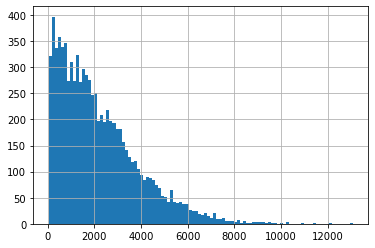

In [13]:
data['Item_Outlet_Sales'].hist(bins=100)

Right Skewed, needs some transformation

#### independent (Numeric variables)

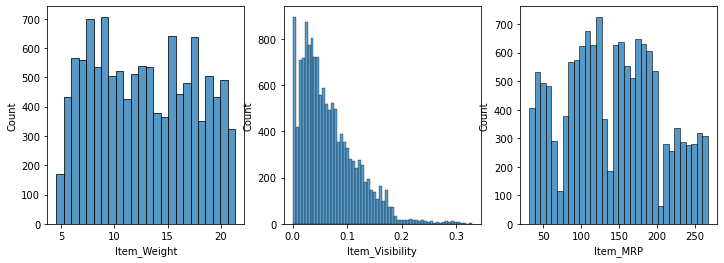

In [27]:
num_var = ['Item_Weight','Item_Visibility','Item_MRP']
plt.figure(figsize=(12,4))
for i,var in enumerate(num_var):
    plt.subplot(1,3,i+1)
    sns.histplot(data=data,x=var,fill='blue')

- There seems to be No clear cut pattern in Item_Weight
- Item_Visibility is Right Skewed and needs transformation
- there are 4 different distribution for Item_MRP 

#### Inependent (Catergorical variables)

In [29]:
cat_var=['Item_Fat_Content']

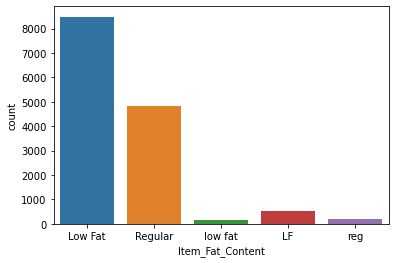

In [30]:
sns.countplot(data=data,x='Item_Fat_Content')

here the LF and Low Fat are same

Regular and reg are same

we can combine them

In [39]:
data['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)

In [43]:
data['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)

In [41]:
data['Item_Fat_Content'].replace('reg','Regular',inplace=True)

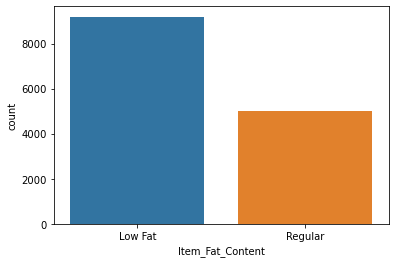

In [44]:
sns.countplot(data=data,x='Item_Fat_Content')

In [45]:
cat_var=['Item_Type','Outlet_Size','Outlet_Identifier']

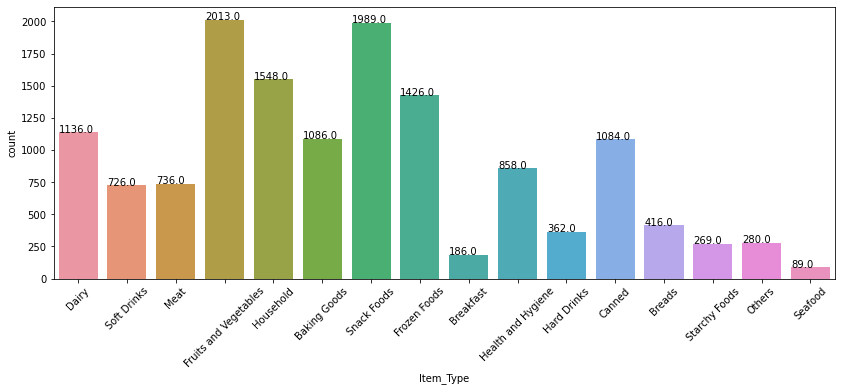

In [51]:
plt.figure(figsize=(14,5))
ax= sns.countplot(data=data,x='Item_Type',)
plt.xticks(rotation=45)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

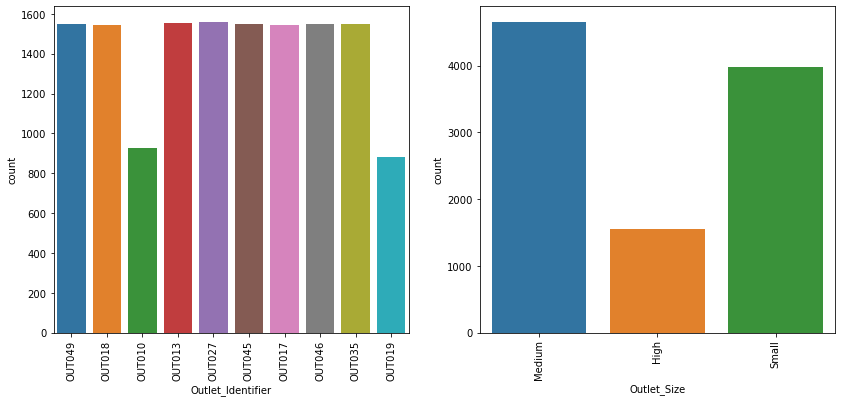

In [65]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1= sns.countplot(data=data,x='Outlet_Identifier',)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax2= sns.countplot(data=data,x='Outlet_Size',)
plt.xticks(rotation=90)
